In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dye=pd.read_csv("absorption wavelength prediction.csv")

In [3]:
dye


,solut_smile,solvent_SMILES,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,...,Col_2046.1,Col_2047.1,PLQY,Et30,SP,SdP,SA,SB,Emission/nm,Absorption/nm
0,C1(C2=NN(C3=CC=CC4=C3C=CC=C4)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.2700,55.4,0.608,0.904,0.605,0.545,296.0,260.0
1,O=C(C1=CC=CC=C1)C2=NN(C3=CC=CC=C3)N=C2C4=CC=CC=C4,CO,0,0,0,0,0,0,0,0,...,0,0,0.0200,55.4,0.608,0.904,0.605,0.545,316.0,263.0
2,C1(C2=NN(C3=NC=CC=C3)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.1500,55.4,0.608,0.904,0.605,0.545,341.0,276.0
3,FC(C=C1)=CC=C1C2=NN(C3=CC=C(F)C=C3)N=C2,CO,0,0,0,0,0,0,0,0,...,0,0,0.4000,55.4,0.608,0.904,0.605,0.545,343.0,277.0
4,O=C(OCC)C1=NN(N=C1C2=CC=CC=C2)C3=CC=C(N(C4=CC=...,C1CCOC1,0,0,0,0,0,0,0,0,...,0,0,0.9600,37.4,0.714,0.634,0.000,0.591,449.0,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,C12=C(CCC3)C4=[N+]3CCCC4=CC1=CC(C5=C2)=C(C6=CC...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0870,40.7,0.761,0.769,0.040,0.178,921.0,880.0
3062,COC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,919.0,880.0
3063,CCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,922.0,882.0
3064,COCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0760,40.7,0.761,0.769,0.040,0.178,926.0,885.0


In [4]:
# Calculate the evaluation parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
def AllParameter(name="Hybrid", y_test=None , y_pred=None):
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False),4)
    r2 = round(r2_score(y_test, y_pred),4)
    evs = round(explained_variance_score(y_test, y_pred),4)
    return name,mae,mse,rmse,evs,r2

In [5]:
# Scatter plot
def scatter_plot(name,y_test,y_pred):
    plt.scatter(y_test, y_pred)
    # Fit a straight line using coefficients
    coefficients = np.polyfit(y_test, y_pred, 1)
    line = np.polyval(coefficients, y_test)

    # Plot straight line
    plt.plot(y_test, line, color='r', label='Line of Coefficients')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.legend()
    plt.show()




In [7]:
dye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 4106 entries, solut_smile to Absorption/nm
dtypes: float64(8), int64(4096), object(2)
memory usage: 96.0+ MB


In [8]:
X = dye.iloc[:, 2 :4105].values
y = dye.iloc[:,4105].values

In [9]:
#for single model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

('Ridge Regression', 11.6168, 308.6881, 17.5695, 0.9629, 0.9628)


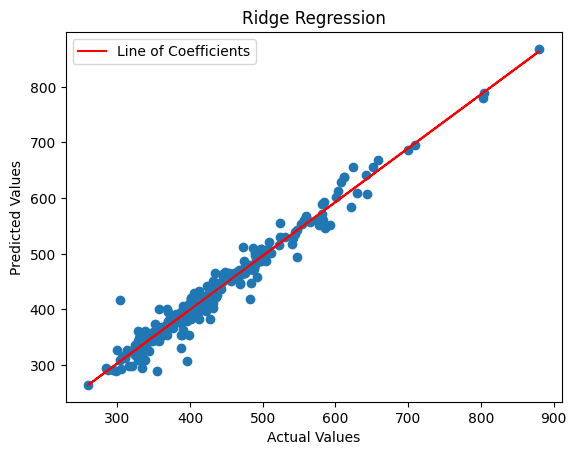

('Lasso Regression', 26.8092, 1370.0462, 37.0141, 0.8347, 0.8347)


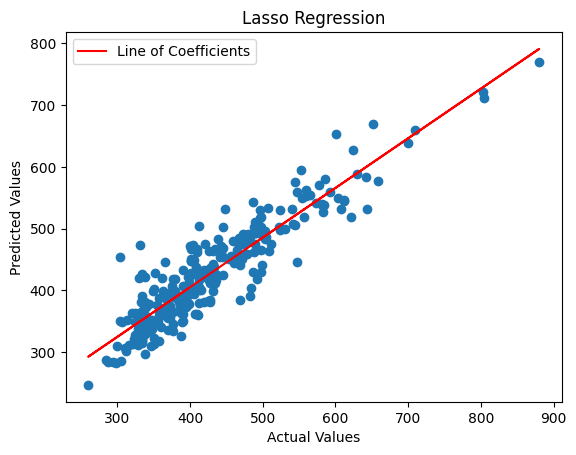

('Elastic Net Regression', 31.1891, 1736.3568, 41.6696, 0.7906, 0.7905)


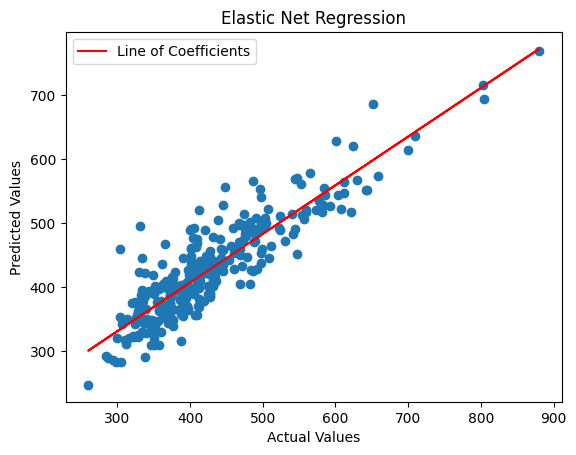

('Decision Tree Regression', 16.6048, 1064.9339, 32.6333, 0.8717, 0.8715)


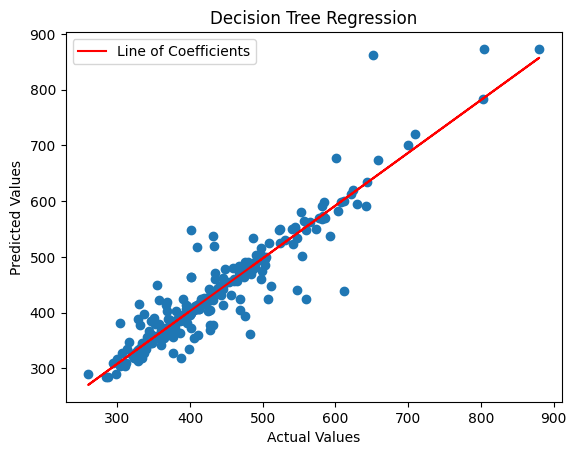

('Random Forest Regression', 11.8147, 439.4084, 20.9621, 0.9471, 0.947)


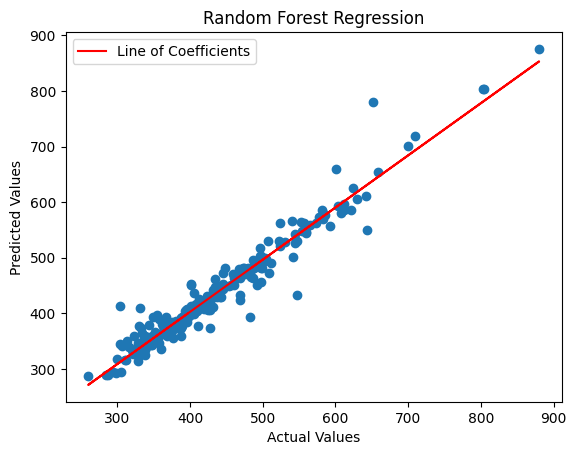

('Extra Trees Regression', 9.2389, 270.0321, 16.4327, 0.9675, 0.9674)


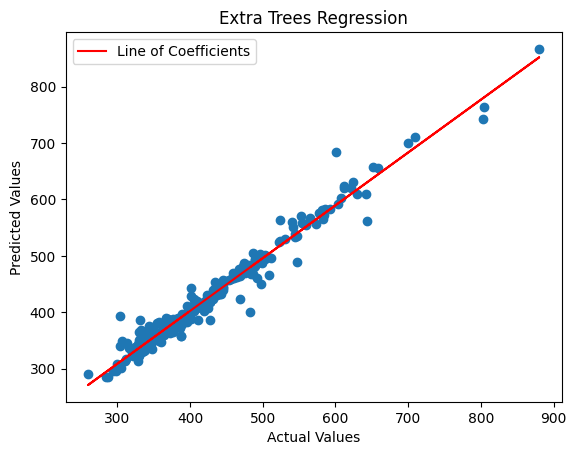

('AdaBoost Regression', 33.9997, 1802.0313, 42.4503, 0.7827, 0.7826)


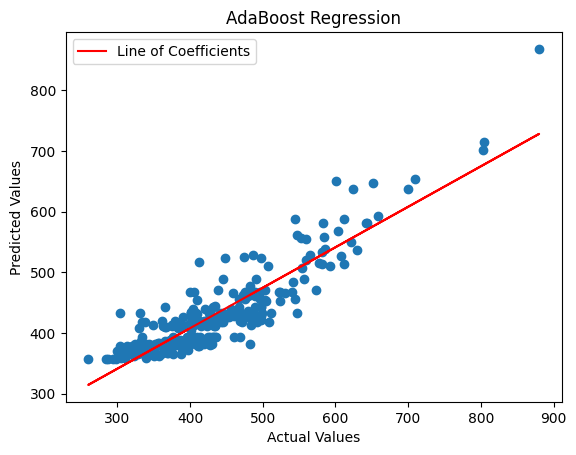

('Gradient Boosting Regression', 19.0698, 692.9548, 26.324, 0.9164, 0.9164)


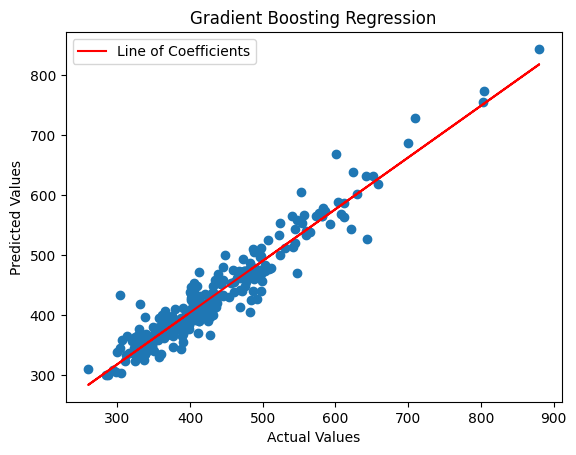

('XGBoost Regression', 13.7667, 433.9407, 20.8312, 0.9477, 0.9477)


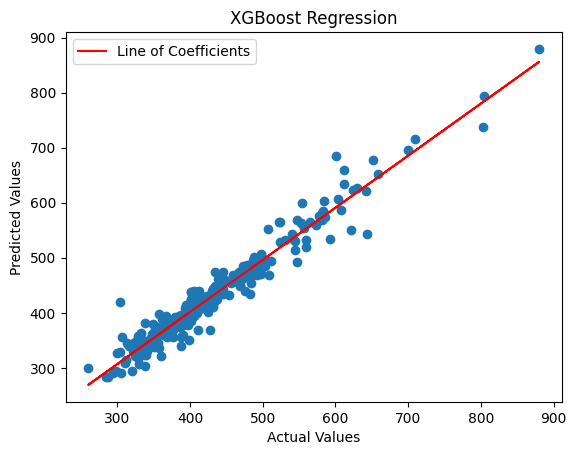

Learning rate set to 0.048064
0:	learn: 88.1501577	total: 238ms	remaining: 3m 58s
1:	learn: 85.4427813	total: 254ms	remaining: 2m 6s
2:	learn: 82.9720105	total: 268ms	remaining: 1m 29s
3:	learn: 80.5402375	total: 283ms	remaining: 1m 10s
4:	learn: 78.3077445	total: 301ms	remaining: 59.9s
5:	learn: 76.0031502	total: 319ms	remaining: 52.9s
6:	learn: 74.0042814	total: 337ms	remaining: 47.8s
7:	learn: 71.9188660	total: 353ms	remaining: 43.8s
8:	learn: 70.0069470	total: 369ms	remaining: 40.7s
9:	learn: 68.2246051	total: 387ms	remaining: 38.3s
10:	learn: 66.4843288	total: 409ms	remaining: 36.7s
11:	learn: 64.8645994	total: 434ms	remaining: 35.8s
12:	learn: 63.3046406	total: 455ms	remaining: 34.5s
13:	learn: 61.8319432	total: 471ms	remaining: 33.2s
14:	learn: 60.2706323	total: 487ms	remaining: 32s
15:	learn: 59.0326318	total: 502ms	remaining: 30.9s
16:	learn: 57.8151713	total: 517ms	remaining: 29.9s
17:	learn: 56.5221995	total: 529ms	remaining: 28.9s
18:	learn: 55.4000681	total: 543ms	remainin

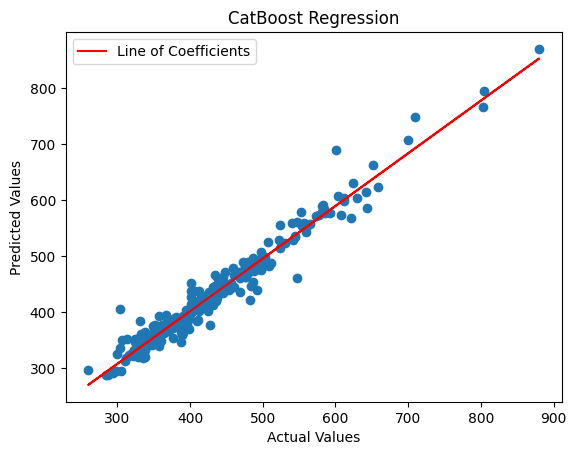

('LightGBM Regression', 13.2645, 400.1621, 20.0041, 0.9518, 0.9517)


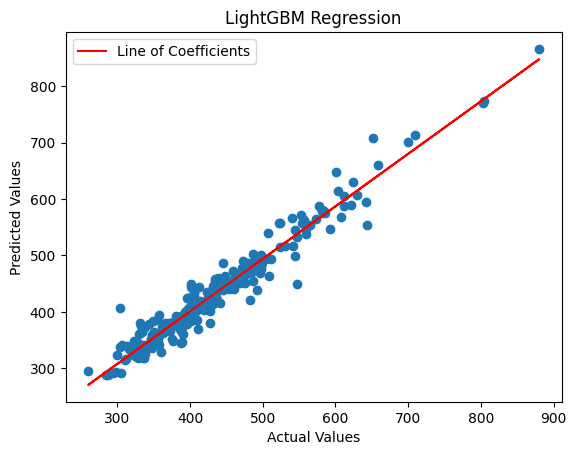

('KNeighbors Regression', 24.5932, 1529.3609, 39.107, 0.8174, 0.8155)


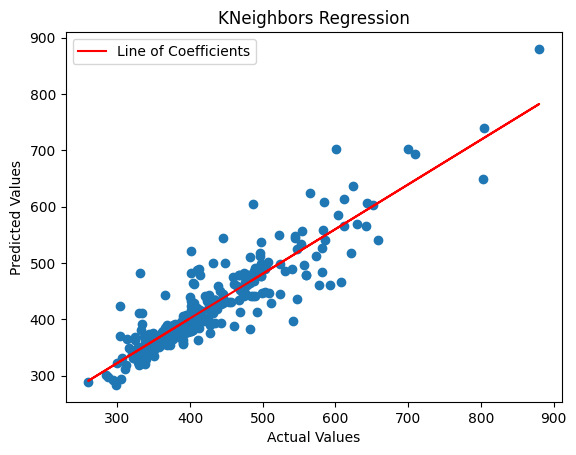

c:\Users\NIT JSR PHYSICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


('MLP Regression', 12.7137, 340.7237, 18.4587, 0.9589, 0.9589)


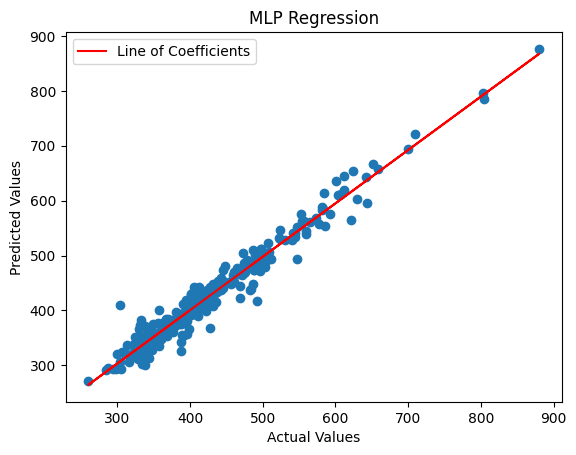

('Bayesian Ridge Regression', 11.6245, 309.8287, 17.602, 0.9628, 0.9626)


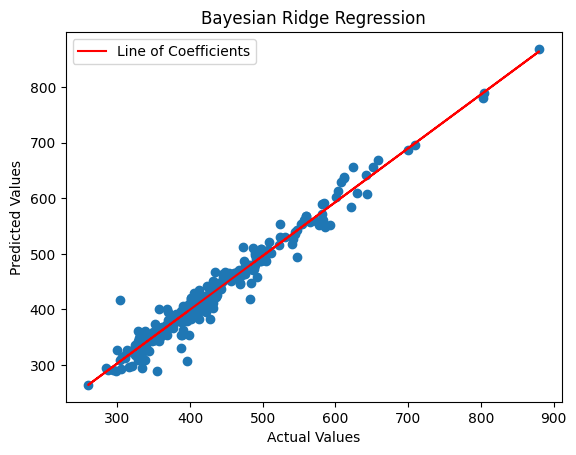

('ARD Regression', 11.9766, 358.0611, 18.9225, 0.9569, 0.9568)


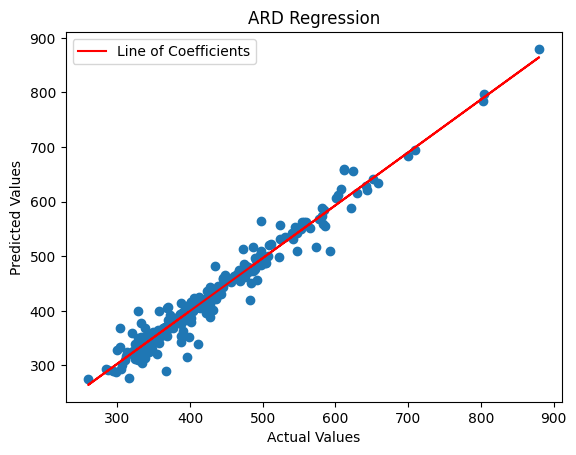

In [11]:
name_of_model=[]
mae=[]
mse=[]
rmse=[]
r2=[]
evs=[]

# Create a list of regression models
models = []
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Elastic Net Regression', ElasticNet()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Extra Trees Regression', ExtraTreesRegressor()))
models.append(('AdaBoost Regression', AdaBoostRegressor()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))
models.append(('XGBoost Regression', XGBRegressor()))
models.append(('CatBoost Regression', CatBoostRegressor()))
models.append(('LightGBM Regression', LGBMRegressor()))
models.append(('KNeighbors Regression', KNeighborsRegressor()))
models.append(('MLP Regression', MLPRegressor()))
models.append(('Bayesian Ridge Regression', BayesianRidge()))
models.append(('ARD Regression', ARDRegression()))
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k=AllParameter(name,y_test, y_pred)
    name_of_model.append(k[0])
    mae.append(k[1])
    mse.append(k[2])
    rmse.append(k[3])
    evs.append(k[4])
    r2.append(k[5])
   
    print(k)
    # graph(name,y_test, y_pred)
    scatter_plot(name,y_test, y_pred)



c:\Users\NIT JSR PHYSICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


('Hybrid Model', 8.8525, 225.7394, 15.0246, 0.9729, 0.9728)


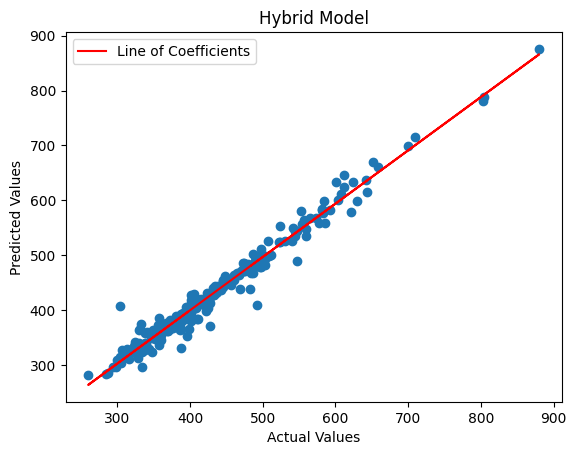

In [14]:
#  Train a MLPRegressor model
model1 = MLPRegressor()
model1.fit(X_train, y_train)

# Use the predictions of the MLPRegressor model as inputs for the ExtraTreesRegressor
pred_model1 = model1.predict(X_train)
X_train_rf = np.column_stack((X_train, pred_model1))
model2 = ExtraTreesRegressor()
model2.fit(X_train_rf, y_train)

# Evaluate the sequential hybrid model
pred_model1_test = model1.predict(X_test)
X_test_rf = np.column_stack((X_test, pred_model1_test))
predictions = model2.predict(X_test_rf)

print(AllParameter('Hybrid Model', y_test, predictions))

scatter_plot('Hybrid Model',y_test, predictions)

